In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Load and Preprocess data

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_dir = '/content/drive/MyDrive/data'  # This should be the path to your dataset

# Define the image generator for training and validation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # setting validation split as 20% of the data
)

# Setup training data generator
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'  # Set as training data
)

# Setup validation data generator
validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Set as validation data
)


Found 51622 images belonging to 94 classes.
Found 12903 images belonging to 94 classes.


##CNN MODEL

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax')
])

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

##Train model

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=10,  # steps per epoch = number of images / batch size
    epochs=5,
    validation_data=validation_generator,
    validation_steps=5  # Same calculation for validation steps
)


Epoch 1/5
10/10 [==============================] - 159s 16s/step - loss: 4.5694 - accuracy: 0.0188 - val_loss: 4.5170 - val_accuracy: 0.0250
Epoch 2/5
10/10 [==============================] - 126s 13s/step - loss: 4.3565 - accuracy: 0.0344 - val_loss: 4.2897 - val_accuracy: 0.0250
Epoch 3/5
10/10 [==============================] - 121s 13s/step - loss: 4.2546 - accuracy: 0.0344 - val_loss: 4.0689 - val_accuracy: 0.0500
Epoch 4/5
10/10 [==============================] - 143s 15s/step - loss: 4.0498 - accuracy: 0.0375 - val_loss: 3.9224 - val_accuracy: 0.0312
Epoch 5/5
10/10 [==============================] - 138s 15s/step - loss: 3.8515 - accuracy: 0.0594 - val_loss: 3.9529 - val_accuracy: 0.0437


##Save and Evaluate model

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


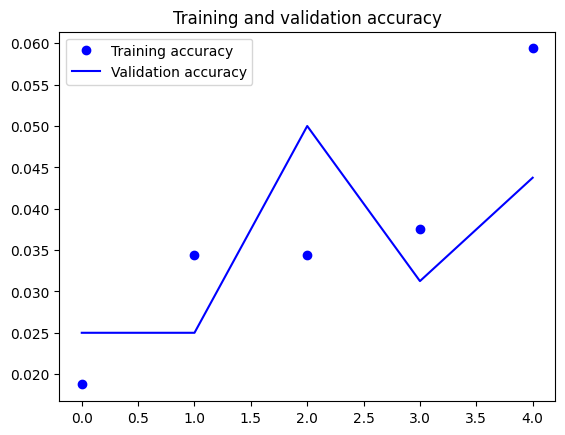

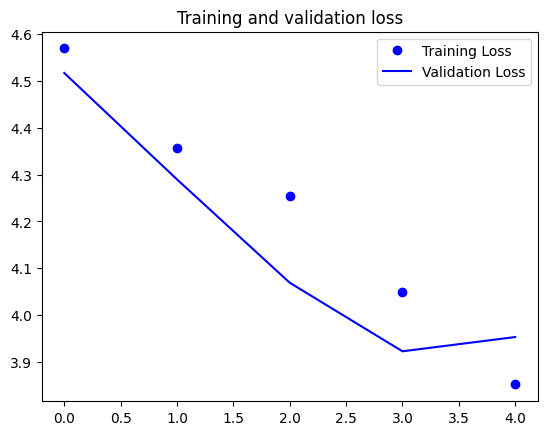

In [ ]:
model.save('/content/drive/MyDrive/project 1/sl_model.h5')

# Plotting training results (optional)
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
